In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# Sample data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Sales': [200, 220, 210, 250, 240, 230, 260, 270, 280, 290]
}

In [6]:
# Create DataFrame
df = pd.DataFrame(data)

In [7]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [8]:
# Feature engineering: Create month, day of week, and lagged sales features
df['Month'] = df.index.month
df['Day_of_Week'] = df.index.dayofweek
df['Lagged_Sales'] = df['Sales'].shift(1)
df.dropna(inplace=True)  # Drop rows with NaN values from shifting


In [9]:
# Define features and target variable
X = df[['Month', 'Day_of_Week', 'Lagged_Sales']]
y = df['Sales']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [11]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions
y_pred = model.predict(X_test)

In [13]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8753.043444828916


In [14]:
print(len(y_test), len(y_pred))

2 2


In [15]:
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')


In [16]:
from sklearn.metrics import mean_squared_error

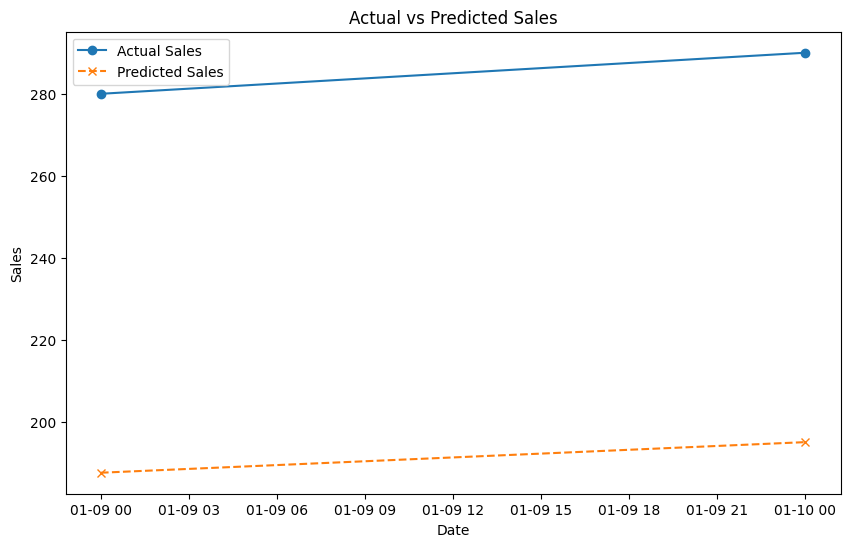

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Sales', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()